# Adding a scale bar to a matplotlib plot
When making a geospatial plot in matplotlib, you can use [maplotlib-scalebar library](https://pypi.org/project/matplotlib-scalebar/) to add a scale bar.

In [1]:
!pip install matplotlib_scalebar
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
from geodatasets import get_path

## Creating a ScaleBar object
The only required parameter for creating a ScaleBar object is `dx`. This is equal to a size of one pixel in real world. Value of this parameter depends on units of your CRS.

### Projected coordinate system (meters)
The easiest way to add a scale bar is using a projected coordinate system with meters as units. Just set `dx = 1`:

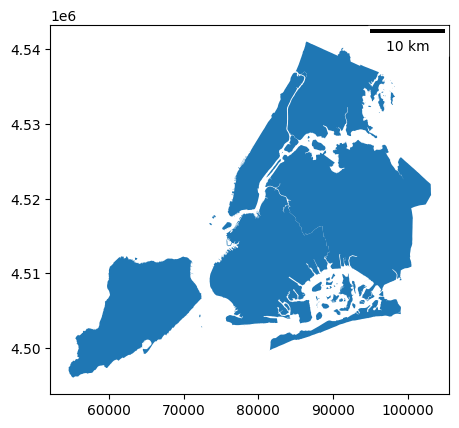

In [2]:
nybb = gpd.read_file(get_path("nybb"))
nybb = nybb.to_crs(32619)  # Convert the dataset to a coordinate
# system which uses meters

ax = nybb.plot()
ax.add_artist(ScaleBar(1))

### Geographic coordinate system (degrees)
With a geographic coordinate system with degrees as units, `dx` should be equal to a distance in meters of two points with the same latitude (Y coordinate) which are one full degree of longitude (X) apart. You can calculate this distance by online calculator [(e.g. the Great Circle calculator)](http://edwilliams.org/gccalc.htm) or in geopandas.\
\
Firstly, we will create a GeoSeries with two points that have roughly the coordinates of NYC. They are located on the same latitude but one degree of longitude from each other. Their initial coordinates are specified in a geographic coordinate system (geographic WGS 84). They are then converted to a projected system for the calculation:

In [3]:
from shapely.geometry.point import Point

points = gpd.GeoSeries(
    [Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=4326
)  # Geographic WGS 84 - degrees
points = points.to_crs(32619)  # Projected WGS 84 - meters

After the conversion, we can calculate the distance between the points. The result slightly differs from the Great Circle Calculator but the difference is insignificant (84,921 and 84,767 meters):

In [4]:
distance_meters = points[0].distance(points[1])

Finally, we are able to use geographic coordinate system in our plot. We set value of `dx` parameter to a distance we just calculated:

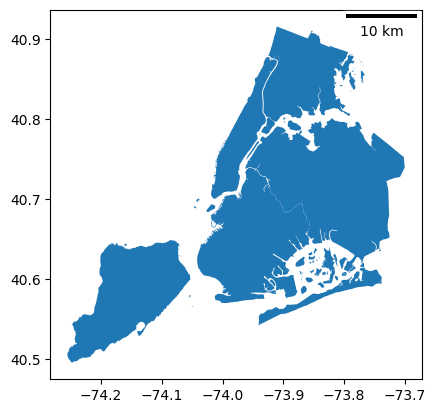

In [5]:
nybb = gpd.read_file(get_path("nybb"))
nybb = nybb.to_crs(4326)  # Using geographic WGS 84

ax = nybb.plot()
ax.add_artist(ScaleBar(distance_meters))

## Using other units 
The default unit for `dx` is m (meter). You can change this unit by the `units` and `dimension` parameters. There is a list of some possible `units` for various values of `dimension` below:

| dimension | units |
| -----     |:-----:|
| si-length | km, m, cm, um|
| imperial-length |in, ft, yd, mi|
|si-length-reciprocal|1/m, 1/cm|
|angle|deg|

In the following example, we will leave the dataset in its initial CRS which uses feet as units. The plot shows scale of 2 leagues (approximately 11 kilometers):

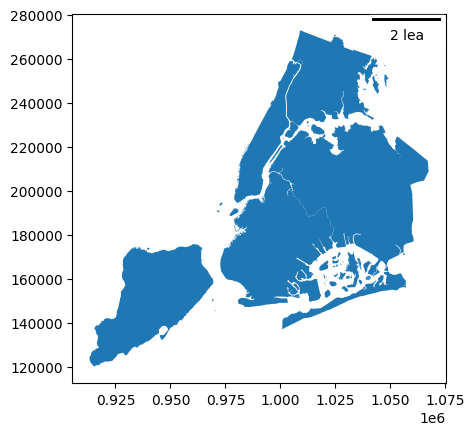

In [6]:
nybb = gpd.read_file(get_path("nybb"))

ax = nybb.plot()
ax.add_artist(ScaleBar(1, dimension="imperial-length", units="ft"))

## Customization of the scale bar

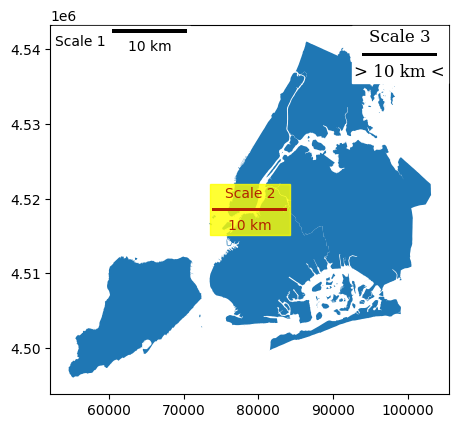

In [7]:
nybb = gpd.read_file(get_path("nybb")).to_crs(32619)
ax = nybb.plot()

# Position and layout
scale1 = ScaleBar(
    dx=1,
    label="Scale 1",
    location="upper left",  # in relation to the whole plot
    label_loc="left",
    scale_loc="bottom",  # in relation to the line
)

# Color
scale2 = ScaleBar(
    dx=1,
    label="Scale 2",
    location="center",
    color="#b32400",
    box_color="yellow",
    box_alpha=0.8,  # Slightly transparent box
)

# Font and text formatting
scale3 = ScaleBar(
    dx=1,
    label="Scale 3",
    font_properties={
        "family": "serif",
        "size": "large",
    },  # For more information, see the cell below
    scale_formatter=lambda value, unit: f"> {value} {unit} <",
)

ax.add_artist(scale1)
ax.add_artist(scale2)
ax.add_artist(scale3)

*Note:* Font is specified by six properties: `family`, `style`, `variant`, `stretch`, `weight`, `size` (and `math_fontfamily`). See [more](https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties).\
\
For more information about matplotlib-scalebar library, see the [PyPI](https://pypi.org/project/matplotlib-scalebar/) or [GitHub](https://github.com/ppinard/matplotlib-scalebar) page.